<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [4]:
# следующая строчка подключает сертификат для защищенного соединения
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [14]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

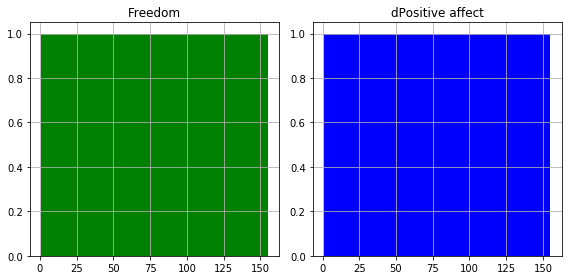

In [44]:
l1 = len(df['Freedom']) - len(df[df['Freedom'].isnull()])
l2 = len(df['Positive affect']) - len(df[df['Positive affect'].isnull()])

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True, figsize=(8, 4))
axs[0].hist(df['Freedom'], bins=l1, facecolor='g')
axs[0].title.set_text('Freedom')
axs[0].grid(True)
axs[1].hist(df['Positive affect'], bins=l2, facecolor = 'b')
axs[1].title.set_text('dPositive affect')
axs[1].grid(True)
plt.show()

<span style='color: blue'><b>Ответ:</b> <em>Это равномерное распределение</em></span>

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [61]:
freedom = df['Freedom'].dropna()
freedom_stats = dict(freedom.describe())
freedom_stats

{'count': 155.0,
 'mean': 78.0,
 'std': 44.88875137492688,
 'min': 1.0,
 '25%': 39.5,
 '50%': 78.0,
 '75%': 116.5,
 'max': 155.0}

In [94]:
print(f"медиана: {statistics.median(freedom)}")
try:
    print(f"мода: {statistics.mode(freedom)}")
except Exception as err:
    print("Мода не может быть посчитана потому что: ", err)    
print(f"математическое ожидание: {freedom_stats['mean']}")
print(f"стандартное отклонение: {freedom_stats['std']:.4f}")
print(f"дисперсия как квадрат СКО: {freedom_stats['std']**2:.1f}")
print(f"дисперсия через модуль statistics: {statistics.variance(freedom)}")
print(f"минимум: {freedom_stats['min']}")
print(f"максимум: {freedom_stats['max']}")
print(f"выбросы:\n {df[df.Freedom.isnull()][['Country (region)', 'Freedom']]}")
print(f"размах: {freedom_stats['max'] - freedom_stats['min']}")


медиана: 78.0
Мода не может быть посчитана потому что:  no unique mode; found 155 equally common values
математическое ожидание: 78.0
стандартное отклонение: 44.8888
дисперсия как квадрат СКО: 2015.0
дисперсия через модуль statistics: 2015.0
минимум: 1.0
максимум: 155.0
выбросы:
    Country (region)  Freedom
28            Qatar      NaN
размах: 154.0


Почему нельзя найти моду?

<span style='color: blue'><b>Ответ:</b> <em>Потому что всех значений равное количество - по одному</em></span>

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [95]:
positive_affect = df['Positive affect'].dropna()

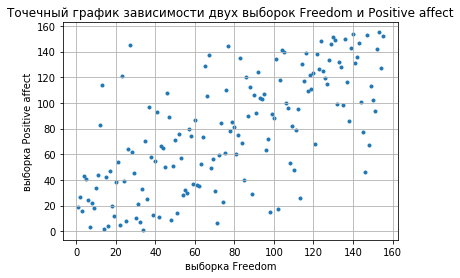

In [107]:
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Точечный график зависимости двух выборок Freedom и Positive affect')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [106]:
corr, p_value = sts.pearsonr(freedom, positive_affect)
print(corr)

0.6817698430601657


<span style='color: blue'><b>Ответ:</b> <em>Знак коэффициента Пирсона говорит от том, положительно или отрицательно зависимы случайные величины.<br>Если случайные величины положительно зависимы, то при увеличении одной другая также увеличивается, если отрицательно зависимы - при увеличении одной другая уменьшается.<br>Значение коэффициента в диапазоне 0.5 - 0.7 говорит о том, что существует "заметная" корреляция между Freedom и positive affect.</em></span>

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [110]:
freedom1 = freedom - freedom_stats['mean']
print(statistics.mean(freedom1))
print(min(freedom1), max(freedom1))

0.0
-77.0 77.0


In [138]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom2 = min_max_scaler.fit_transform(np.array(freedom).reshape(-1, 1)).reshape(len(freedom))
print(min(freedom2), max(freedom2))

-0.9999999999999999 1.0000000000000002


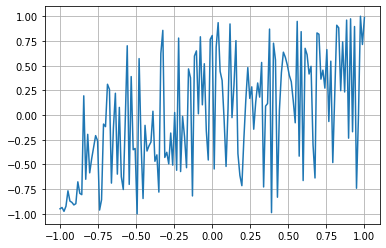

In [135]:
plt.grid(True)
plt.plot(np.linspace(min(freedom2), max(freedom2), len(freedom2)), freedom2)

Построить матрицу корреляций для всех колонок таблицы

In [227]:
all_corr = df.corr()
all_corr

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.539362,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.813367,0.816740
SD of Ladder,0.539362,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.629662,0.611376
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
Log of GDP\nper capita,0.813367,0.629662,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.847580
Healthy life\nexpectancy,0.816740,0.611376,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.847580,1.000000


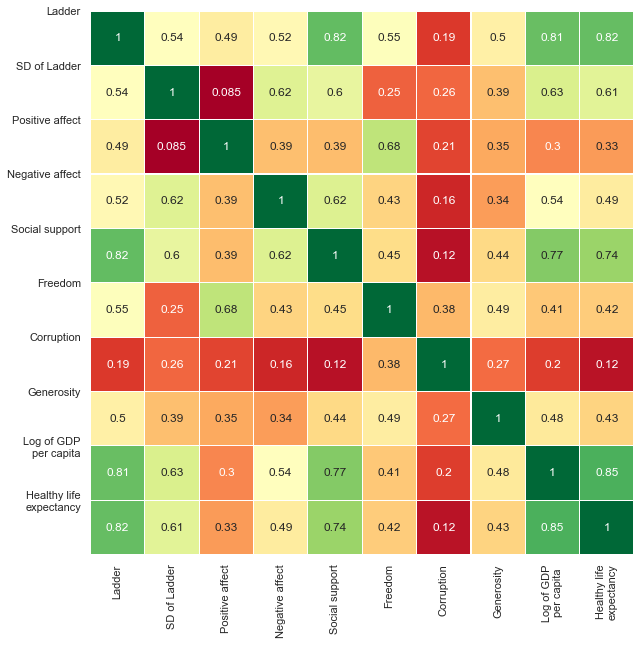

In [253]:
import seaborn as sns
sns.set()

ind = all_corr.index
yticks = np.linspace(0, len(ind), len(ind) + 1, dtype=np.int)

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(all_corr, annot=True, cmap='RdYlGn',linewidths=0.2, square = True, cbar = False)
ax.set_yticks(yticks)
ax.set_yticklabels(all_corr.index)
plt.show()

Загрузить таблицу цен на авокадо: 

In [236]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

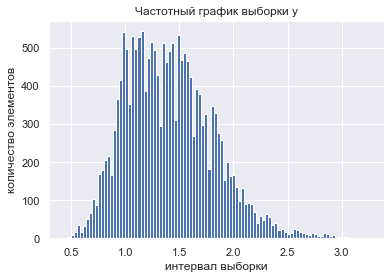

In [237]:
plt.hist(df['AveragePrice'],100)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

<span style='color: blue'><b>Ответ:</b> <em>Нормальные распределение с небольшим смещением вправо (positive-skew distributions).</em></span>

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [246]:
av_corr = df[['4046', '4225', '4770', 'AveragePrice']].corr()
av_corr

,4046,4225,4770,AveragePrice
4046,1.000000,0.926110,0.833389,-0.208317
4225,0.926110,1.000000,0.887855,-0.172928
4770,0.833389,0.887855,1.000000,-0.179446
AveragePrice,-0.208317,-0.172928,-0.179446,1.000000


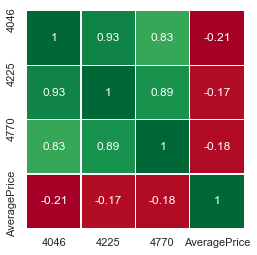

In [255]:
ind = all_corr.index
yticks = np.linspace(0, 4, 5, dtype=np.int)

f, ax = plt.subplots(figsize=(4, 4))
ax = sns.heatmap(av_corr, annot=True, cmap='RdYlGn',linewidths=0.2, square = True, cbar = False)
ax.set_yticks(yticks)
ax.set_yticklabels(av_corr.index)
plt.show()

<span style='color: blue'><b>Ответ:</b> <em>Существует значительная положительная корреляция между продажами авокадо с разными кодами, т.е. если продажи авкадо растут, они растут для всех категорий.<br>В то же время, у всех категорий авокадо есть отрицательная корреляция с ценой - при повышении цены продажи снижаются.</em></span>